In [9]:
"""
eda of county data gathered

also review correlations between target and features

compare metro and non-metro counties

target: Median_HH_Income_2019

"""

'\neda of county data gathered\n\nalso review correlations between target and features\n\ntarget: Median_HH_Income_2019\n\n'

In [1]:
import pickle
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
with open('county_eda_data.pickle', 'rb') as read_file:
    eda_ready = pickle.load(read_file)
    
eda_ready.head()

,FIPS_code,Stabr,area_name,Area_Name,Median_Household_Income_2019,pop_est_2019,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,...,Farming_2015_Update,Mining_2015-Update,Manufacturing_2015_Update,Government_2015_Update,Recreation_2015_Update,Nonspecialized_2015_Update,Low_Education_2015_Update,Low_Employment_Cnty_2008_2012_25_64,Retirement_Dest_2015_Update,Persistent_Poverty_2013
0,01001,AL,"Autauga County, AL",Autauga County,58233.0,55869.0,26172.0,25458.0,714.0,2.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,01003,AL,"Baldwin County, AL",Baldwin County,59871.0,223234.0,97328.0,94675.0,2653.0,2.7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,01005,AL,"Barbour County, AL",Barbour County,35972.0,24686.0,8537.0,8213.0,324.0,3.8,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,01007,AL,"Bibb County, AL",Bibb County,47918.0,22394.0,8685.0,8419.0,266.0,3.1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,01009,AL,"Blount County, AL",Blount County,52902.0,57826.0,25331.0,24655.0,676.0,2.7,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [3]:
eda_ready.columns

Index(['FIPS_code', 'Stabr', 'area_name', 'Area_Name',
       'Median_Household_Income_2019', 'pop_est_2019',
       'Civilian_labor_force_2019', 'Employed_2019', 'Unemployed_2019',
       'Unemployment_rate_2019', 'hwy_count', 'city_count', 'town_count',
       'Metro_2013', 'Rural_urban_continuum_code_2013', 'Farming_2015_Update',
       'Mining_2015-Update', 'Manufacturing_2015_Update',
       'Government_2015_Update', 'Recreation_2015_Update',
       'Nonspecialized_2015_Update', 'Low_Education_2015_Update',
       'Low_Employment_Cnty_2008_2012_25_64', 'Retirement_Dest_2015_Update',
       'Persistent_Poverty_2013'],
      dtype='object')

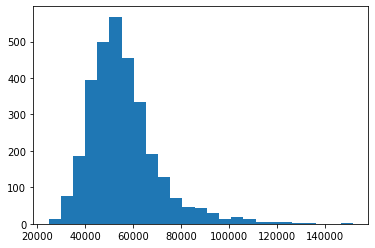

In [4]:
# histogram of target
plt.hist(eda_ready['Median_Household_Income_2019'], bins=25);

<ipython-input-5-579600179900>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels);


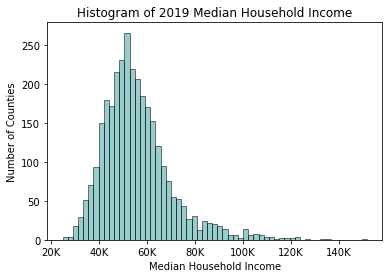

In [5]:
g= sns.histplot(eda_ready['Median_Household_Income_2019'], color='teal', alpha=0.4);
plt.xlabel('Median Household Income')
plt.ylabel('Number of Counties')

#xtick_labels = 
#ticks_x = np.linspace(0, 6, 7)

#plt.xticks(['20k','40k','60k','80k','100k','120k', '140k']);

plt.title('Histogram of 2019 Median Household Income')
xlabels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels);

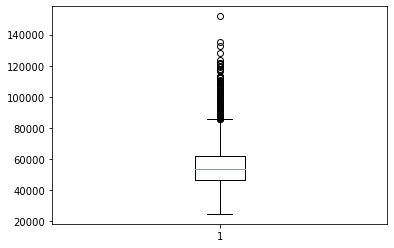

In [6]:
plt.boxplot(eda_ready['Median_Household_Income_2019']);

In [8]:
from scipy import stats

stats.iqr(eda_ready['Median_Household_Income_2019'])



15770.5

In [9]:
import numpy as np
np.percentile(eda_ready['Median_Household_Income_2019'], 25)

46278.0

In [10]:
np.percentile(eda_ready['Median_Household_Income_2019'], 75)

62048.5

In [11]:
num_features = eda_ready[['Median_Household_Income_2019','pop_est_2019',
       'Civilian_labor_force_2019', 'Employed_2019', 'Unemployed_2019',
       'Unemployment_rate_2019', 'hwy_count', 'city_count', 'town_count']]

num_features.head()

,Median_Household_Income_2019,pop_est_2019,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,hwy_count,city_count,town_count
0,58233.0,55869.0,26172.0,25458.0,714.0,2.7,6.0,2.0,2.0
1,59871.0,223234.0,97328.0,94675.0,2653.0,2.7,12.0,8.0,6.0
2,35972.0,24686.0,8537.0,8213.0,324.0,3.8,11.0,2.0,4.0
3,47918.0,22394.0,8685.0,8419.0,266.0,3.1,8.0,2.0,3.0
4,52902.0,57826.0,25331.0,24655.0,676.0,2.7,9.0,2.0,14.0


In [12]:
num_features.corr()

,Median_Household_Income_2019,pop_est_2019,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,hwy_count,city_count,town_count
Median_Household_Income_2019,1.000000,0.288810,0.306322,0.308592,0.242538,-0.407873,0.105659,0.212433,0.071735
pop_est_2019,0.288810,1.000000,0.997914,0.997622,0.981720,-0.055542,0.307614,0.420049,0.053446
Civilian_labor_force_2019,0.306322,0.997914,1.000000,0.999964,0.977366,-0.067779,0.305282,0.420636,0.058583
Employed_2019,0.308592,0.997622,0.999964,1.000000,0.975535,-0.070478,0.304737,0.421006,0.059187
Unemployed_2019,0.242538,0.981720,0.977366,0.975535,1.000000,0.001090,0.311682,0.401503,0.042154
Unemployment_rate_2019,-0.407873,-0.055542,-0.067779,-0.070478,0.001090,1.000000,-0.026357,-0.120727,-0.052942
hwy_count,0.105659,0.307614,0.305282,0.304737,0.311682,-0.026357,1.000000,0.189112,0.046756
city_count,0.212433,0.420049,0.420636,0.421006,0.401503,-0.120727,0.189112,1.000000,-0.085382
town_count,0.071735,0.053446,0.058583,0.059187,0.042154,-0.052942,0.046756,-0.085382,1.000000


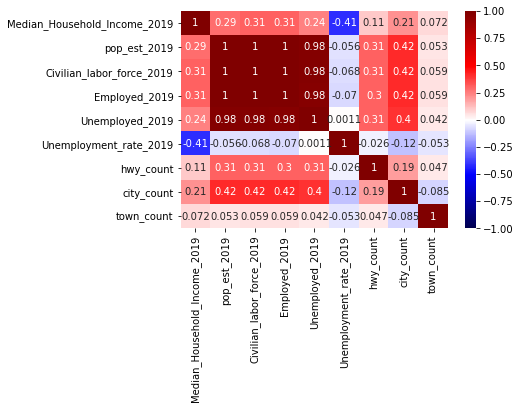

In [18]:
sns.heatmap(num_features.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [13]:
# as expected the pop and labor force #'s are correlated with one another
# will keep for the model 'Civilian_labor_force_2019' and 'Unemployment_rate_2019'

# will combine city and town counts 

num_features['city_town_counts'] = num_features['city_count'] + num_features['town_count']
eda_ready['city_town_counts'] = eda_ready['city_count'] + eda_ready['town_count']

num_filtered = num_features[['Median_Household_Income_2019', 'Civilian_labor_force_2019',
       'Unemployment_rate_2019', 'hwy_count', 'city_town_counts']]

<ipython-input-13-659f9cbc3a12>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_features['city_town_counts'] = num_features['city_count'] + num_features['town_count']


In [14]:
num_filtered.head()

,Median_Household_Income_2019,Civilian_labor_force_2019,Unemployment_rate_2019,hwy_count,city_town_counts
0,58233.0,26172.0,2.7,6.0,4.0
1,59871.0,97328.0,2.7,12.0,14.0
2,35972.0,8537.0,3.8,11.0,6.0
3,47918.0,8685.0,3.1,8.0,5.0
4,52902.0,25331.0,2.7,9.0,16.0


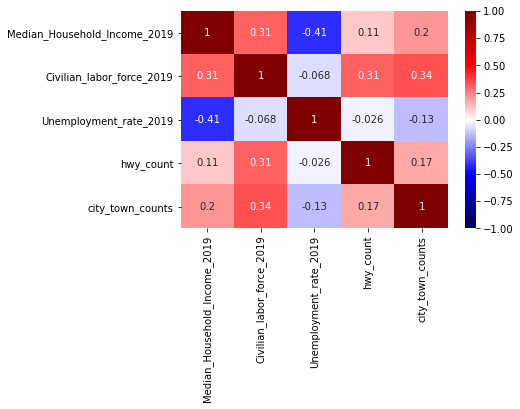

In [15]:
sns.heatmap(num_filtered.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

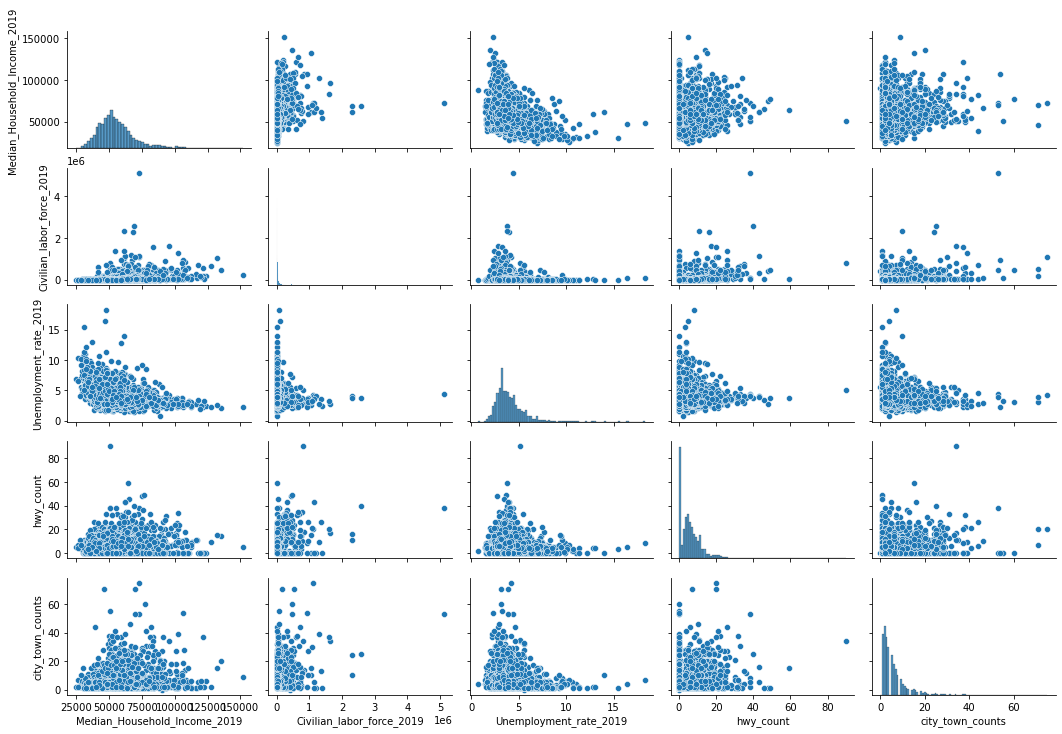

In [16]:
# pairplot

sns.pairplot(num_filtered, height=2, aspect=1.5);

In [17]:
# 

county_model_data = eda_ready[['FIPS_code', 'Stabr', 'area_name', 'Area_Name',
       'Median_Household_Income_2019', 'Civilian_labor_force_2019',                   
       'Unemployment_rate_2019', 'hwy_count', 'city_town_counts', 
       'Metro_2013', 'Rural_urban_continuum_code_2013', 'Farming_2015_Update',
       'Mining_2015-Update', 'Manufacturing_2015_Update',
       'Government_2015_Update', 'Recreation_2015_Update',
       'Nonspecialized_2015_Update', 'Low_Education_2015_Update',
       'Low_Employment_Cnty_2008_2012_25_64', 'Retirement_Dest_2015_Update',
       'Persistent_Poverty_2013']]

In [18]:
county_model_data.head()

,FIPS_code,Stabr,area_name,Area_Name,Median_Household_Income_2019,Civilian_labor_force_2019,Unemployment_rate_2019,hwy_count,city_town_counts,Metro_2013,...,Farming_2015_Update,Mining_2015-Update,Manufacturing_2015_Update,Government_2015_Update,Recreation_2015_Update,Nonspecialized_2015_Update,Low_Education_2015_Update,Low_Employment_Cnty_2008_2012_25_64,Retirement_Dest_2015_Update,Persistent_Poverty_2013
0,01001,AL,"Autauga County, AL",Autauga County,58233.0,26172.0,2.7,6.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,01003,AL,"Baldwin County, AL",Baldwin County,59871.0,97328.0,2.7,12.0,14.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,01005,AL,"Barbour County, AL",Barbour County,35972.0,8537.0,3.8,11.0,6.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,01007,AL,"Bibb County, AL",Bibb County,47918.0,8685.0,3.1,8.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,01009,AL,"Blount County, AL",Blount County,52902.0,25331.0,2.7,9.0,16.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [25]:
with open('county_model_data.pickle', 'wb') as to_write:
    pickle.dump(county_model_data, to_write)

In [26]:
# one feature that may need scaled

stats.boxcox(county_model_data['Civilian_labor_force_2019'])

# lambda almost 0 means best transformation is log

(array([6.75034875, 7.26256776, 6.26472475, ..., 6.29045536, 5.90096307,
        5.88461723]),
 -0.08700259413775045)

In [19]:
## look at inc by metro
metro_only = county_model_data[county_model_data['Metro_2013']==1]
metro_only.head()

,FIPS_code,Stabr,area_name,Area_Name,Median_Household_Income_2019,Civilian_labor_force_2019,Unemployment_rate_2019,hwy_count,city_town_counts,Metro_2013,...,Farming_2015_Update,Mining_2015-Update,Manufacturing_2015_Update,Government_2015_Update,Recreation_2015_Update,Nonspecialized_2015_Update,Low_Education_2015_Update,Low_Employment_Cnty_2008_2012_25_64,Retirement_Dest_2015_Update,Persistent_Poverty_2013
0,01001,AL,"Autauga County, AL",Autauga County,58233.0,26172.0,2.7,6.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,01003,AL,"Baldwin County, AL",Baldwin County,59871.0,97328.0,2.7,12.0,14.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,01007,AL,"Bibb County, AL",Bibb County,47918.0,8685.0,3.1,8.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,01009,AL,"Blount County, AL",Blount County,52902.0,25331.0,2.7,9.0,16.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
7,01015,AL,"Calhoun County, AL",Calhoun County,47747.0,46209.0,3.5,11.0,9.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


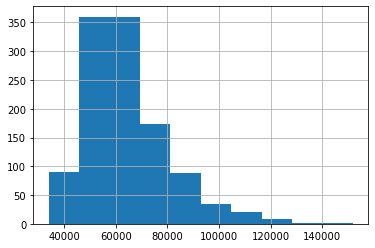

In [22]:
metro_only['Median_Household_Income_2019'].hist();

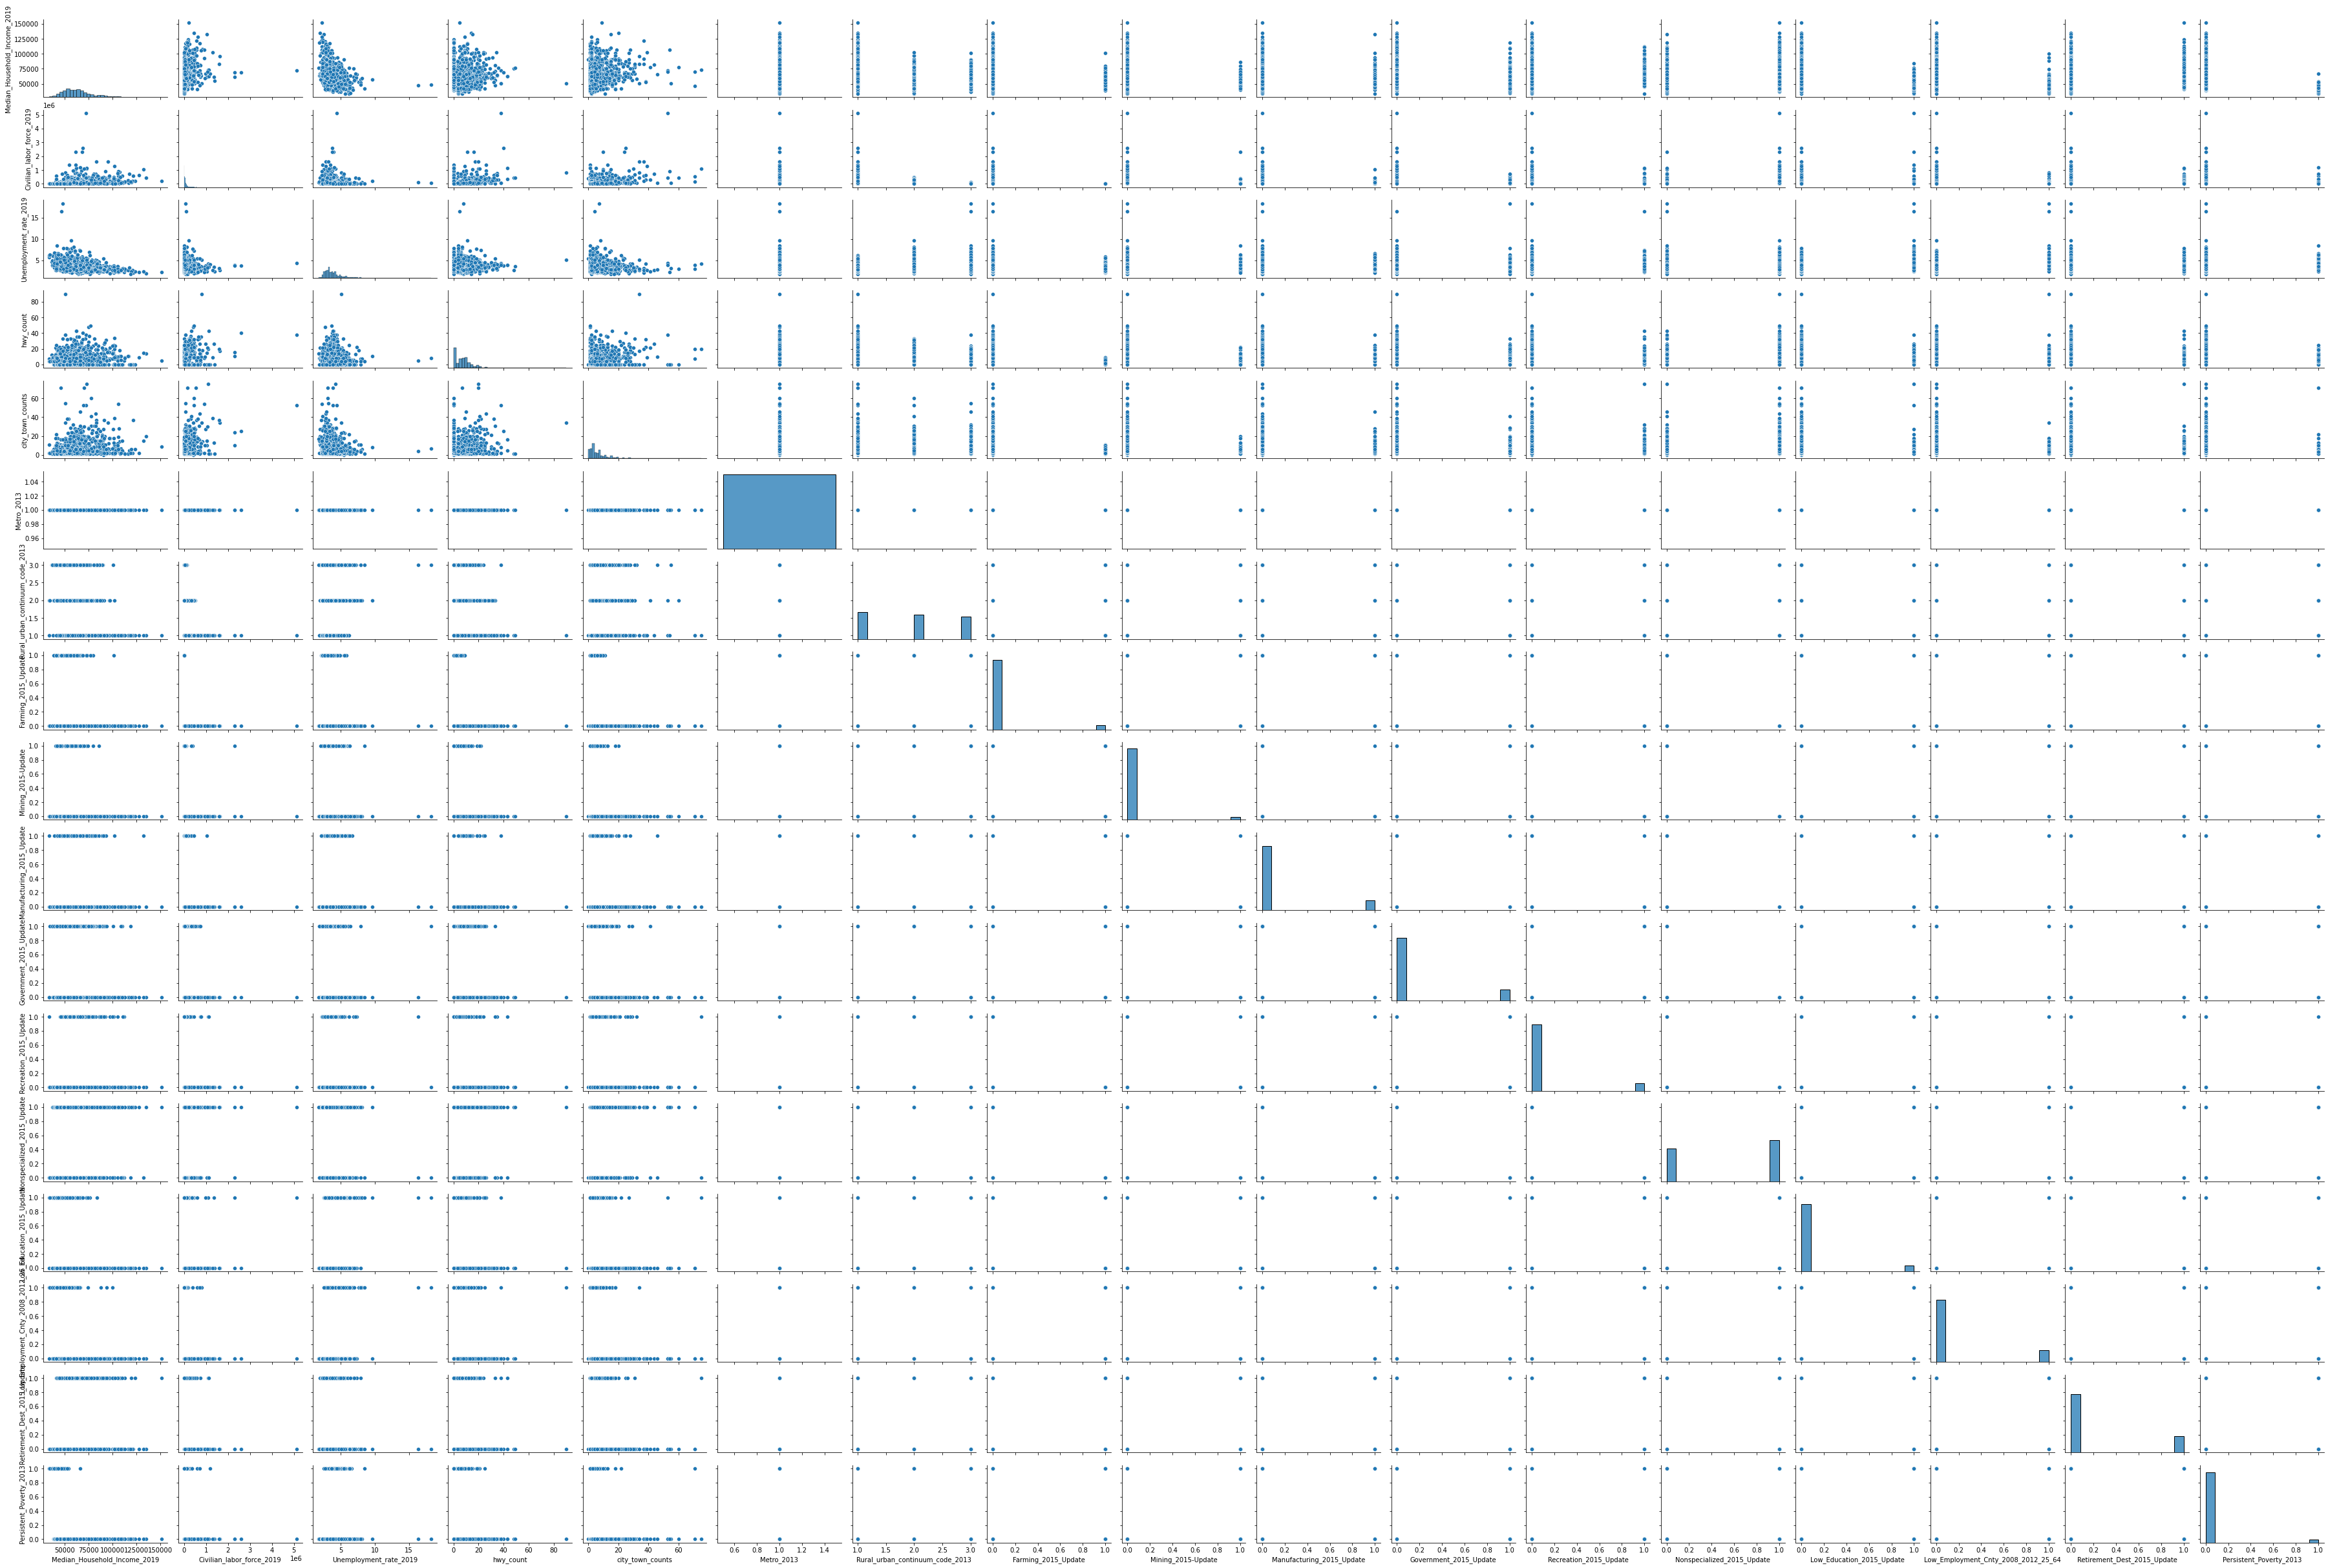

In [26]:
sns.pairplot(metro_only, height=2, aspect=1.5);

In [23]:
non_metro = county_model_data[county_model_data['Metro_2013']==0]

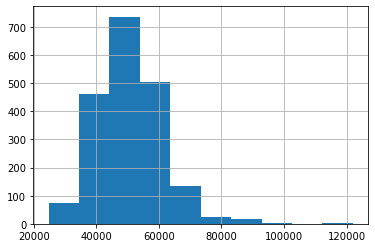

In [24]:
non_metro['Median_Household_Income_2019'].hist();

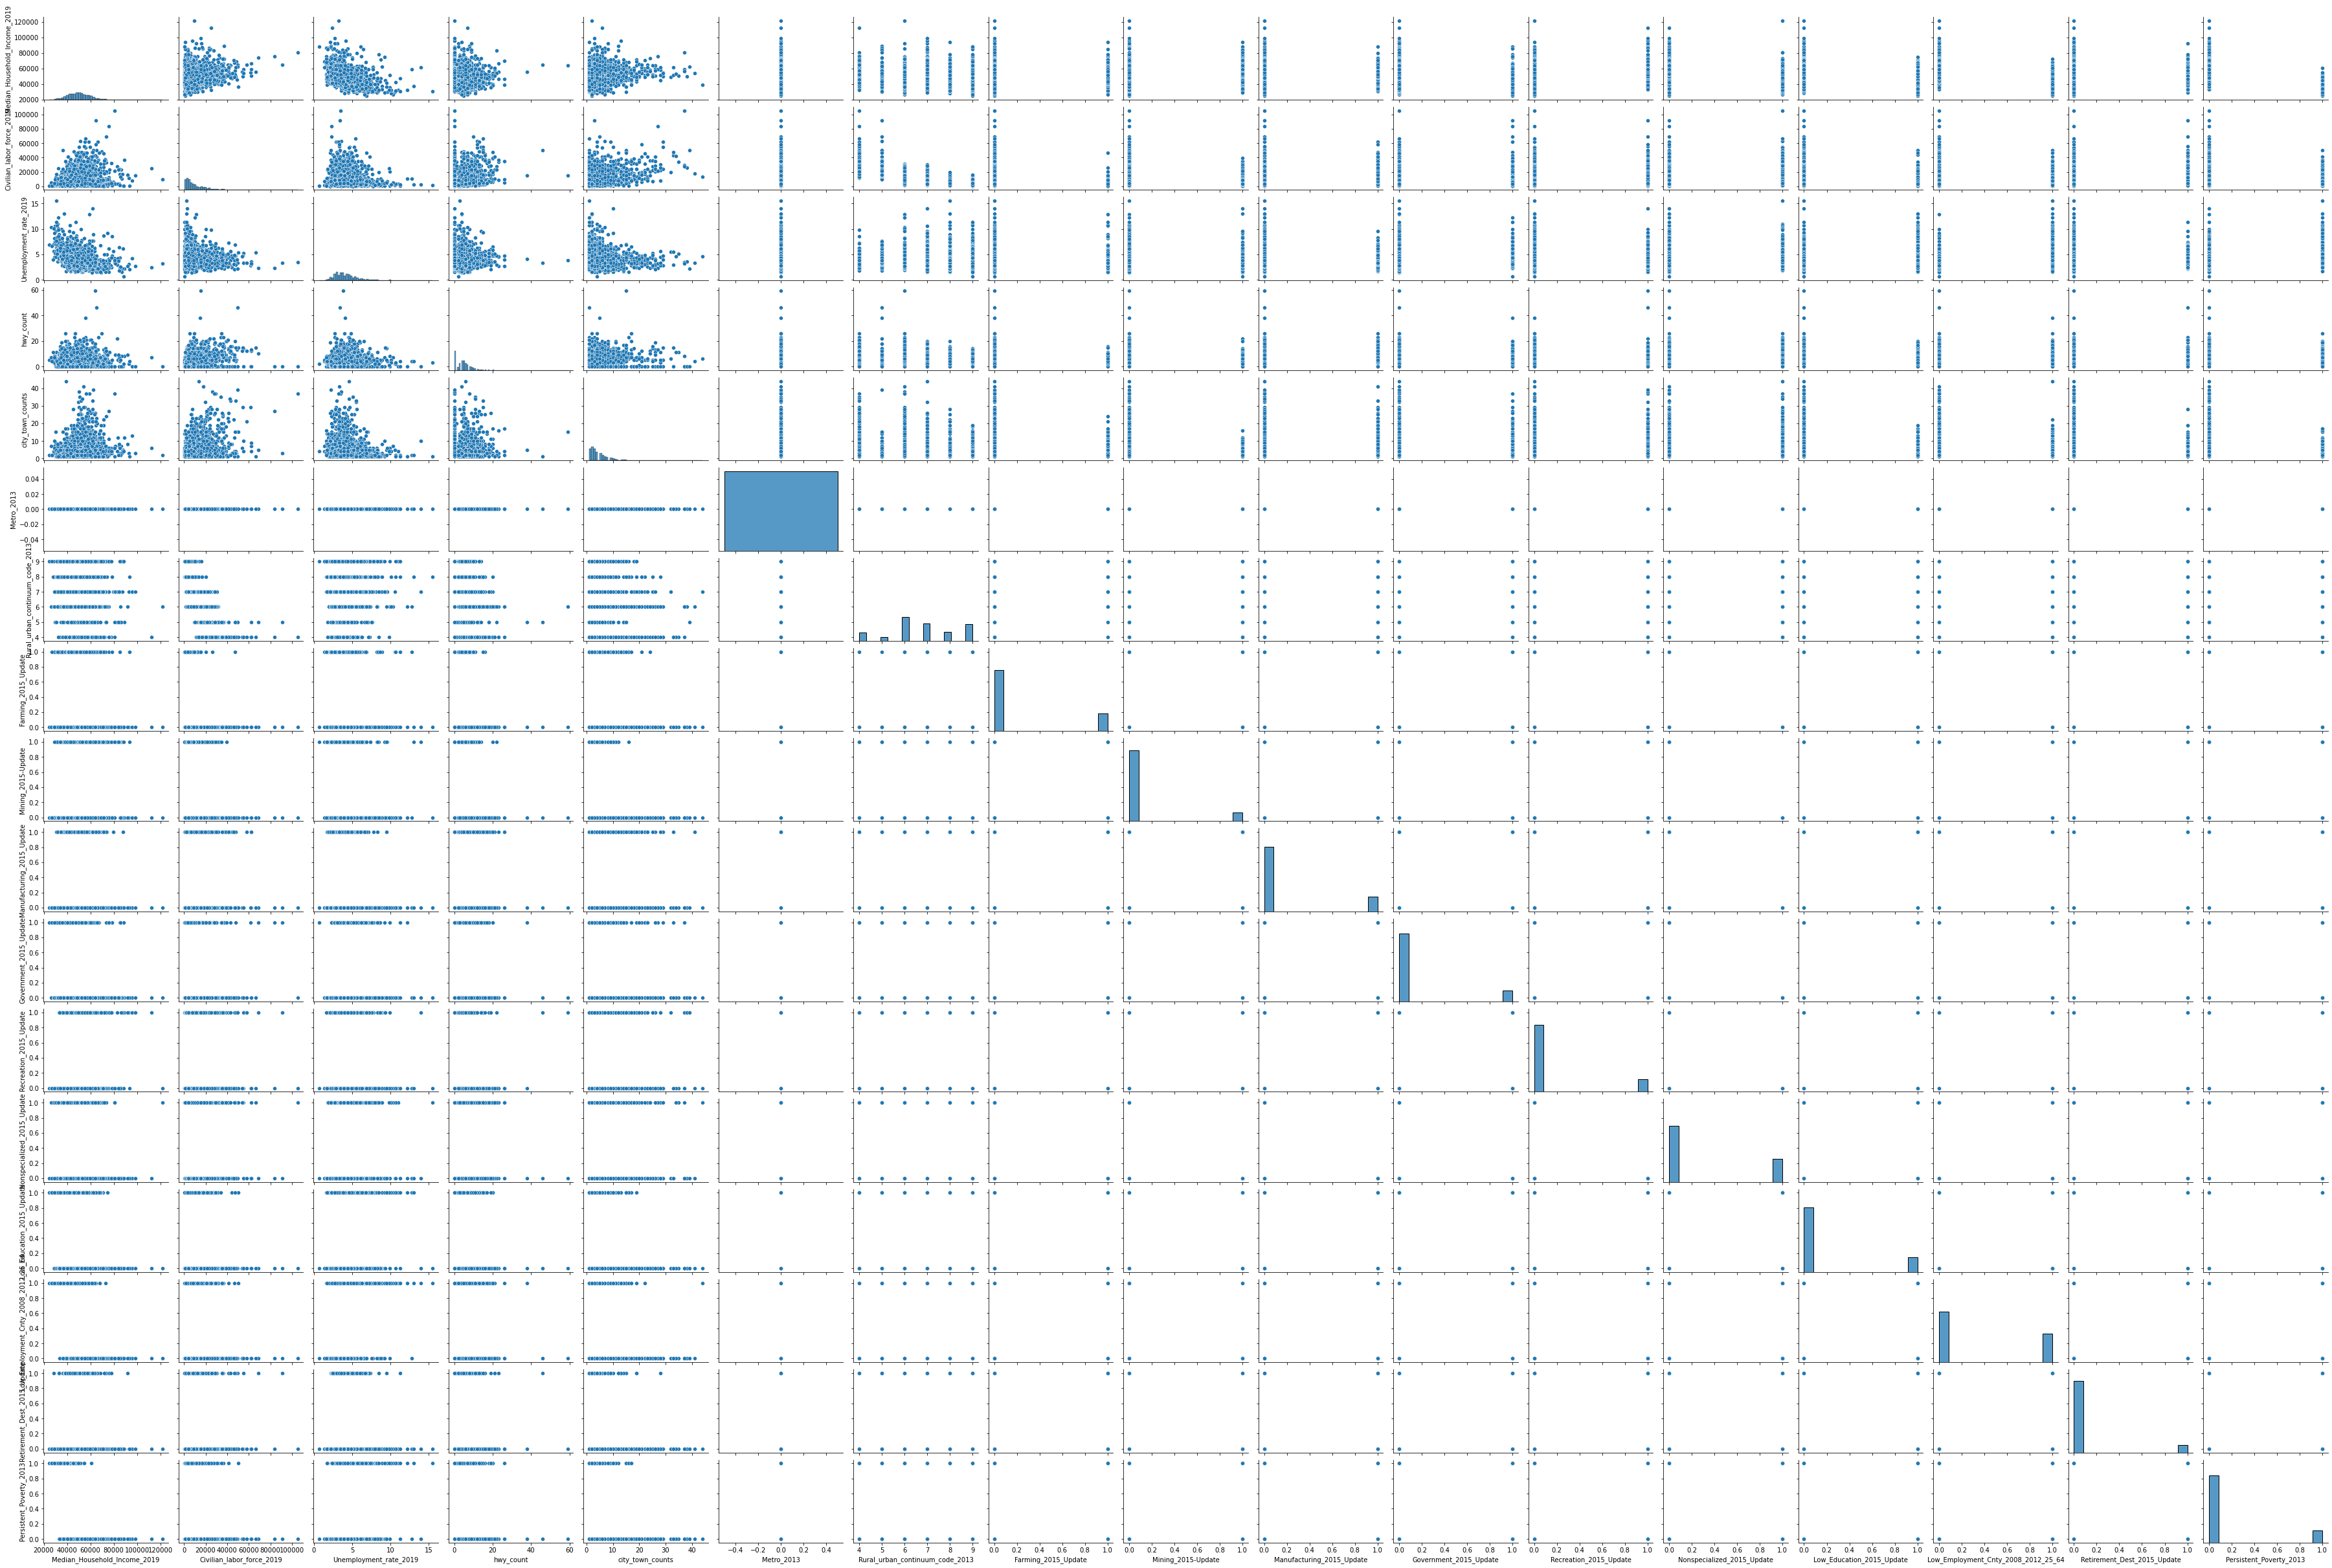

In [25]:
sns.pairplot(non_metro, height=2, aspect=1.5);